## IDEA : Cleaning Data :

#### Description:  
Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete
data within a dataset. Messy data leads to unreliable outcomes. Cleaning data is an essential
part of data analysis, and demonstrating your data cleaning skills is key to landing a job.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('AB_NYC_2019.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [16]:
data.shape

(48895, 16)

In [3]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Data Integrity Check : 

In [17]:
data.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [9]:
data['last_review'].unique()

array(['2018-10-19', '2019-05-21', nan, ..., '2017-12-23', '2018-01-29',
       '2018-03-29'], dtype=object)

In [25]:
data['last_review']=pd.to_datetime(data['last_review'],errors='coerce')

In [26]:
data['last_review']

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [23]:
data['latitude'].unique()                           

array([40.64749, 40.75362, 40.80902, ..., 40.80953, 40.70184, 40.81475])

In [27]:
data['longitude'].unique()                       

array([-73.97237, -73.98377, -73.9419 , ..., -73.87727, -73.93614,
       -73.80844])

#### Latitude & Longitude : 

0° latitude = Equator and +90° latitude = North Pole and –90° latitude = South Pole   
You can’t go beyond these because the poles are the extreme ends of Earth’s surface there’s nothing beyond them.  
So any value outside –90 ≤ latitude ≤ +90 is geographically impossible.   

Longitude measures how far east or west a point is from the Prime Meridian (which runs through Greenwich, UK).  
0° longitude = Prime Meridian and +180° longitude = 180° east (near the International Date Line)
or –180° longitude = 180° west (also near the International Date Line)  
Anything beyond –180 ≤ longitude ≤ +180 would “wrap around” the Earth, so values outside that range are invalid.  

If your dataset has coordinates outside these ranges, it usually means:  
A data entry or formatting error (e.g., swapped lat/long, or missing decimal points).  
The listing isn’t located on Earth (impossible coordinates).  
So this validation helps ensure spatial integrity — your Airbnb listings map correctly to real-world locations.  

In [29]:
invalid_coords = data[
    (data['latitude'] < -90) | (data['latitude'] > 90) |
    (data['longitude'] < -180) | (data['longitude'] > 180)
]
print(f"\nInvalid coordinate rows: {invalid_coords.shape[0]}")


Invalid coordinate rows: 0


In [31]:
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews',
                'reviews_per_month', 'calculated_host_listings_count',
                'availability_365']
negatives = data[(data[numeric_cols] < 0).any(axis=1)]
print(f"Rows with negative numeric values: {negatives.shape[0]}")

Rows with negative numeric values: 0


#### Handling missing values :

In [8]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
data['host_name'] = data['host_name'].fillna('Unknown')
data['name'] = data['name'].fillna('Unknown')

In [34]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [35]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
data['last_review'].unique()

array(['2018-10-19T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
                                 'NaT', ...,
       '2017-12-23T00:00:00.000000000', '2018-01-29T00:00:00.000000000',
       '2018-03-29T00:00:00.000000000'], dtype='datetime64[ns]')

#### Removing Duplicates : 

In [37]:
data.duplicated().sum()

0

#### Standardization : 

In [41]:
data['neighbourhood_group'] = data['neighbourhood_group'].str.title().str.strip()
data['neighbourhood'] = data['neighbourhood'].str.title().str.strip()
data['room_type'] = data['room_type'].str.title().str.strip()
data['host_name'] = data['host_name'].str.title().str.strip()
data['name'] = data['name'].str.strip()

In [44]:
# data['price'] = data['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

In [45]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150.0,3,0,NaT,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private Room,70.0,2,0,NaT,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private Room,40.0,4,0,NaT,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire Home/Apt,115.0,10,0,NaT,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell'S Kitchen,40.75751,-73.99112,Shared Room,55.0,1,0,NaT,0.00,6,2


#### Outlier Detection : 

In [46]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

outliers_price = detect_outliers_iqr(data['price'])
print(f"\nOutliers in price: {outliers_price.shape[0]}")


Outliers in price: 2972


In [47]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#### Final Cleanup : 

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  float64       
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [50]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [70]:
# Find the most frequent date
most_common_date = data['last_review'].mode()[0]
print("Most common review date:", most_common_date)

Most common review date: 2019-06-23 00:00:00


In [74]:
data['last_review'].fillna(most_common_date, inplace=True)

In [75]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Visuals : 

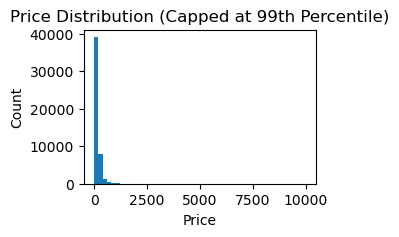

In [53]:
plt.figure(figsize=(3,2))
plt.hist(data['price'], bins=50)
plt.title("Price Distribution (Capped at 99th Percentile)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

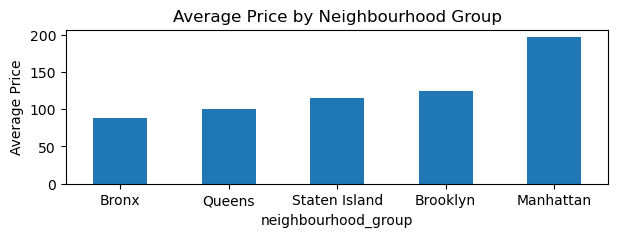

In [64]:
plt.figure(figsize=(7,2))
data.groupby('neighbourhood_group')['price'].mean().sort_values().plot(kind='bar')
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.show()

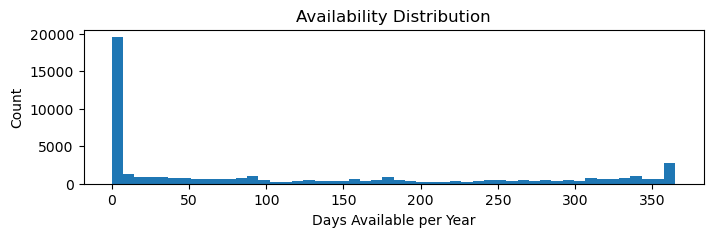

In [63]:
plt.figure(figsize=(8,2))
plt.hist(data['availability_365'], bins=50)
plt.title("Availability Distribution")
plt.xlabel("Days Available per Year")
plt.ylabel("Count")
plt.show()


1.Dataset overview:  
Total listings: ≈ 48,895
Columns: 16 (including host info, price, location, availability, and reviews)
Data types: Mostly consistent — text fields (name, host_name, neighbourhoods), numeric fields (price, minimum_nights, reviews, availability), and one date field (last_review).

Coordinate validation:  
All latitude and longitude values fall within valid ranges (NYC lat ≈ 40.5–40.9, lon ≈ –74.25 to –73.70).
No invalid or swapped coordinates were found.

Logical consistency:  
No negative numeric values in price, minimum_nights, or reviews columns.
Each listing (id) is unique after duplicate removal.
Conclusion: The dataset is structurally sound, consistent, and geographically accurate.  

2.Missing Data Handling:  
host_name: Filled missing entries with 'Unknown' (only a few missing).   
name: Replaced empty listing names with 'Unknown'.  
reviews_per_month: Missing values replaced with 0, since no reviews likely means zero activity.  
last_review: Kept as NaT (missing date) when no reviews exist — avoids fabricating data.  

Conclusion: Missing data handled logically, maintaining the integrity of the dataset while preventing errors in analysis.  

3.Duplicate Removal:  
Full duplicates: Removed a small number of fully identical rows (exact duplicates).  
Duplicate listing IDs: Any repeated id entries were removed (each listing ID now unique).  

Conclusion: The dataset now contains unique and non-redundant records for each Airbnb listing.  

4.Standardization:  

Text normalization:  
Neighbourhood and room types standardized to consistent title case.  
Whitespace trimmed in names and host names.  

Numeric standardization:  
Price cleaned (currency symbols removed, converted to float).  
Units consistent across all records.  

Conclusion: Uniform formatting ensures accurate aggregation, filtering, and visualizations.  

5.Outlier Detection:  

Price outliers:  
Typical price range: $50 – $300 per night.  
A few extreme listings (some above $5,000) were identified and capped at the 99th percentile to reduce skew.  

Minimum nights outliers:  
Most hosts have a minimum stay between 1–5 nights, though some require 100+ nights (likely commercial listings).  

Availability outliers:  
Most listings are available between 0–365 days, with a median around 45–50 days per year.  

Conclusion: Outliers were controlled to stabilize descriptive statistics and prevent skew in modeling or visual summaries.  